In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

##Preprocess the data

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17465344/17464789 [==============================] - 2s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


## Train the data
Train a simple recurrent network using an Embedding layer and a SimpleRNN layer:

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.5173 - acc: 0.7533 - val_loss: 0.4719 - val_acc: 0.7766
Epoch 2/10
20000/20000 [==============================] - 106s 5ms/step - loss: 0.2942 - acc: 0.8853 - val_loss: 0.3430 - val_acc: 0.8554
Epoch 3/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.2337 - acc: 0.9117 - val_loss: 0.6198 - val_acc: 0.7598
Epoch 4/10
20000/20000 [==============================] - 104s 5ms/step - loss: 0.2012 - acc: 0.9254 - val_loss: 0.3257 - val_acc: 0.8790
Epoch 5/10
20000/20000 [==============================] - 103s 5ms/step - loss: 0.1767 - acc: 0.9353 - val_loss: 0.6946 - val_acc: 0.8162
Epoch 6/10
20000/20000 [==============================] - 101s 5ms/step - loss: 0.1589 - acc: 0.9432 - val_loss: 0.3303 - val_acc: 0.8610
Epoch 7/10
20000/20000 

## Plot the data

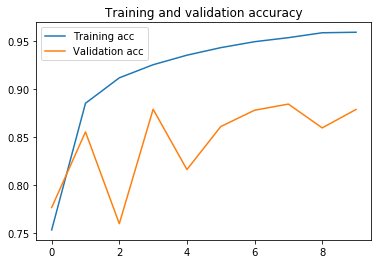

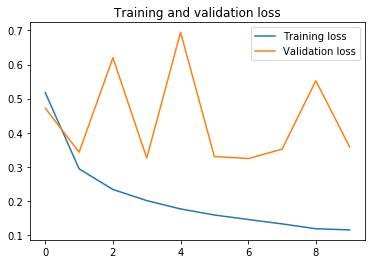

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()